# Introdução às Redes Neurais

Esse notebook é designado para introduzir os principais conceitos de Redes Neurais, como Layers, Networks e Optimizers, bem como seus casos de uso mais frequentes.

Iremos utilizar a api do Keras com o Tensorflow em todo notebook. Ao fim, você será capaz de implementar e entender arquiteturas de redes neurais para a maioria dos casos.

## Anatomia das redes neurais

Incialmente, vamos revisar alguns conceitos básicos de Deep Learning. O fluxo de interação entre cada parte da rede neural é descrita na imagem abaixo.

### Fluxo de interação

<a ><img src='https://i.ibb.co/9NCCnVC/fluxo-treino-deeplearning.png' border='0' alt='conv' width=360 height=300/></a>


1. **Forward Propagation** - A rede processa os Inputs X, os transformando sucessivamente com os pesos até a saída Y.
2. **Cálculo do custo** - É calculado um custo baseado na diferença da predição Y e da realidade.
3. **Backpropagation** - Um algoritmo de otimização ajusta os pesos da rede baseado no gradiente da função custo.
4. O processo se repete até o custo se tornar constante.





### Layers

As Layers são o bloco básico de construção na maioria das APIs de DeepLearning. Uma Layer é um módulo básico de transformação de dados, que recebe um ou mais Tensores como Input e os transforma em um ou mais Tensores como Output. 

A grande maioria das Layers possuem *Pesos*, que são ajustados conforme o treinamento de uma rede ocorre, entretanto podem haver algumas sem eles, geralmente responsáveis por tarefas mais específicas. 
Diferentes tipos de Layers podem ser aplicadas para as mais variadas tarefas. Usualmente, dados simples armazenados em Tensores 2D são processados por camadas *Fully Connected*, também chamadas de *Dense Layers*. Dados sequenciais, geralmente Tensores 3D, são tipicamente processados por camadas recorrentes, como LSTM e GRU, que possuem conexões especiais para o tratamento desses cenários. No caso de Imagens e outros sinais estáticos, usualmente são aplicadas camadas Convolucionais.
 
Camadas são o bloco básico de construção, é com elas que definimos o comportamento desejado do nosso modelo, podem ser misturadas e modificadas especificamente para a tarefa desejada. É essa estrutura que provê ao DeepLearning a versatilidade de atuar em várias classes de problemas com grande desempenho. 

<a ><img src='https://i.stack.imgur.com/iHW2o.jpg' border='0' alt='conv' width=275 height=150/></a>


*Exemplo de Dense Layer*

<a ><img src='https://storage.googleapis.com/stateless-ml2grow-com/2019/12/6ceaa100-screenshot_20191228_154409-800x395.png' border='0' alt='conv' width=350 height=200/></a>

*Exemplo de Recurrent Layer*

### Modelos

Um modelo de deep learning é um grafo direcionado e aciclíco de camadas. A forma mais comum de conectar as layers é de forma linear, sempre mapeando um Input para um Output. Entretanto, algumas arquiteturas propõem se a utilizar multi-Inputs e multi-Outputs.

### Funções de custo e otimizadores

Com a arquitetura do modelo devidamente definido, precisamos definir quais os critérios ele deve tentar alcançar. Em DeepLearning, a tarefa do modelo é minimizar a **Função de custo** e isto é feito por meio do **Otimizador**.

A escolha adequada de uma função de custo é fundamental para o avanço do modelo. É ela quem irá desafiar o modelo e lhe dizer, através do otimizador, quais parâmetros devem ser modificados. Usualmente, uma função de custo possui alguma métrica de diferença para avaliar a distância entre o valor predito e o valor real, mas também podem ser incorporados outros elementos, como funções regularizadoras e funções de casos específicos.

Felizmente, para os problemas mais clássicos, classificação e regressão, as funções de custo são populares e bem definidas, e não precisamos nos preocupar em reinventar a roda.

Para problemas de regressão, usualmente utilizamos o Erro Quadrático Médio,
 e para classificação, as funções de Entropia Cruzada.

$MSE(y) = \frac{1}{n}(y - \hat y)^2$

$CE(y) = \frac{1}{n}y\log(\hat y)2$

## Introdução ao Keras

A partir daqui, seguiremos utilizando a API do Keras (https://keras.io) com o Tensorflow. Keras foi uma API desenvolvida para permitir um ingresso fácil e rápido na área de Deep Learning, provendo blocos de alto-nível para construção de redes neurais, além de várias ferramentas user-friedly. O funcionamento do Keras se baseia em maper as ferramentas de baixo-nível desenvolvidas por outras bibliotecas, como TensorFlow e Theano, para uma interface única, geral e alto-nível.

Com a adesão oficial do Tensorflow 2.0 com o Keras, essa união rapidamente se tornou a mais popular para soluções de Deep Learning, além de servir de porta de entrada para a maioria dos usuários de IA.

![](https://miro.medium.com/max/1000/1*94aYxMPfqqQsv4AJ8A_5Lw.jpeg)

### Desenvolvendo com o Keras: Rápido Overview

In [ ]:
from tensorflow import keras

O fluxo típico de trabalho com o keras segue o seguinte passo a passo:

1. Definir os inputs e outputs
2. Definir o modelo e sua arquitetura
3. Compilar o modelo com a função de perda e o otimizador
4. Iniciar o processo de treino

Existem duas formas de instanciar um modelo no Keras, com a classe Sequential, que permite somente a ligação direta de um input com um output, e com a Functional API, mais flexível.

Nos nossos exemplos, usaremos apenas a classe Sequential.

In [ ]:
# Imports iniciais
from keras.layers import InputLayer, Dense
from keras.models import Sequential

O instanciamento de um modelo Sequencial segue o simples padrão 

In [ ]:
modelo = Sequential()

Para adicionar uma camada, basta chamar o método *.add()* da classe.

No caso abaixo, adicionamos uma camada de Input. 

*Obs. Geralmente, a maioria das camadas do Keras possuem o parâmetro input_shape, fazendo desnecessário a inclusão dessa layer.*

In [ ]:
modelo.add( InputLayer(input_shape=(214) ) )

Em seguida, adicionaremos uma camada Dense. O primeiro número passado é a quantidade de neurônios, também passamos uma função de ativação. 

O Keras se responsabiliza por fazer adequadamente as conexões entre as camadas anteriores e posteriores.

In [ ]:
modelo.add( Dense(32, activation="relu") )

O método .summary() nos dá uma visão geral da estrutura do modelo.

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                6880      
Total params: 6,880
Trainable params: 6,880
Non-trainable params: 0
_________________________________________________________________


Supondo que queiramos efetuar uma tarefa de regressão simples, finalizaremos a rede com uma camada densa de apenas 1 neurônio.

In [ ]:
modelo.add( Dense(1, activation="relu") )

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                6880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


Após a definição da arquitetura do modelo, passamos para fase de compilação, onde iremos definir a função de custo, o otimizador e, caso necessário, alguns outros parâmetros.

In [ ]:
modelo.compile(optimizer="adam", loss="mean_squared_error")

Pronto! Nosso modelo já está pronto para a etapa de treino. 

Como até aqui nossos dados são ficcionais, nenhum treino será feito, mas o uso da função *.fit()* é tão simples quanto os passos anteriores.

```python
modelo.fit(X,y, epochs)
```

### Prevendo o preço de casas - Boston Housing Dataset

Um típico Dataset para iniciar análises em machine Learning é o Boston Housing. Ele contém 13 atributos de casas de em vários locais de Boston, que datam da época de 1970, bem como o preço médio de uma casa.

Mais informação sobre o dataset no [link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Esse Dataset está disponível no Keras, basta importa-lo.

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
# Visualizando os dados X
X_train[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [ ]:
# Visualizando os dados Y
y_train[:3]

array([15.2, 42.3, 50. ])

In [ ]:
len(X_train) + len(X_test)

506

Ele contém um total de 506 registros, dividios entre treino e teste. A nossa missão é criar uma rede neural que consiga prever, com base nos atributos X, o preço Y da casa.

**Definindo o Modelo**

Inicialmente, vamos aplicar os conceitos trabalhados anteriormente, instanciando um modelo sequencial.

In [ ]:
modelo_house = Sequential()

Podemos visualizar o Shape dos nossos dados X no parâmetro .shape

In [ ]:
X_train.shape

(404, 13)

Nosso dado, como citado na introdução ao exercício, possui 13 atributos. Portanto, nossa primeira camada precisa ter um *input_shape*=13. 

Para explorar mais possibilidades, não utilizaremos a camada InputLayer(). Ao invés, vamos usar uma camada Dense e dizer, em sua instanciação, qual o formato do input. Essa camada terá 40 neurônios e ativação ReLU 

In [ ]:
modelo_house.add( Dense(40, activation="relu", input_shape=(13,)) )

Sabemos que nosso modelo precisa prever apenas 1 valor real, portanto, seu output final precisa ter tamanho 1.Adicionaremos a camada responsável por essa transformação.

In [ ]:
modelo_house.add( Dense(1, activation="relu") )

In [ ]:
modelo_house.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 40)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


Com essa arquitetura, já somos capazes de prever o valor das casas.

Seguiremos compilando o modelo

In [ ]:
modelo_house.compile(optimizer="adam",
                     loss="mean_squared_error")

Por fim, o método de treinamento.

In [ ]:
modelo_house.fit(X_train, y_train, 
                 epochs=40)

Epoch 1/40
13/13 [==============================] - 0s 2ms/step - loss: 3156.4221
Epoch 2/40
13/13 [==============================] - 0s 2ms/step - loss: 764.0420
Epoch 3/40
13/13 [==============================] - 0s 2ms/step - loss: 576.8635
Epoch 4/40
13/13 [==============================] - 0s 2ms/step - loss: 577.7105
Epoch 5/40
13/13 [==============================] - 0s 2ms/step - loss: 578.4684
Epoch 6/40
13/13 [==============================] - 0s 2ms/step - loss: 577.6004
Epoch 7/40
13/13 [==============================] - 0s 2ms/step - loss: 576.5798
Epoch 8/40
13/13 [==============================] - 0s 1ms/step - loss: 575.8766
Epoch 9/40
13/13 [==============================] - 0s 1ms/step - loss: 575.6701
Epoch 10/40
13/13 [==============================] - 0s 2ms/step - loss: 575.1053
Epoch 11/40
13/13 [==============================] - 0s 2ms/step - loss: 573.7554
Epoch 12/40
13/13 [==============================] - 0s 2ms/step - loss: 565.9771
Epoch 13/40
13/13 [=====

Durante o processo de treino, podemos ver a diminuição da Loss ao longo das épocas, o que significa que nosso modelo está se ajustando aos dados.

Para ter uma visão das previsões do modelo nos dados de Treino, vamos plotar um gráfico.

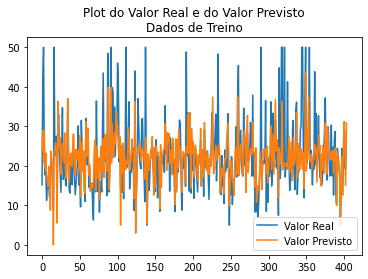

In [ ]:
import matplotlib.pyplot as plt

# Função usada para predizer os valores
y_train_predict = modelo_house.predict(X_train)

plt.plot(y_train, label="Valor Real")
plt.plot(y_train_predict, label="Valor Previsto" )
plt.title("Plot do Valor Real e do Valor Previsto\nDados de Treino")
plt.legend()
plt.show()

Graficamente, podemos perceber que a rede realmente foi capaz de se ajustar aos dados de treino. Faremos a mesma análise para os dados de Teste.

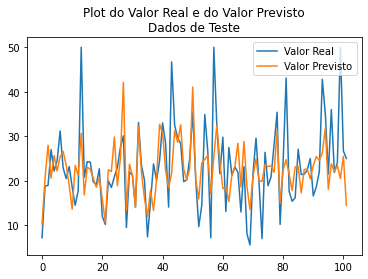

In [ ]:
y_test_predict = modelo_house.predict(X_test)

plt.plot(y_test, label="Valor Real")
plt.plot(y_test_predict, label="Valor Previsto" )
plt.title("Plot do Valor Real e do Valor Previsto\nDados de Teste")
plt.legend()
plt.show()

Um comportamento similar aos dados de treino, o que é um bom sinal, indicado que não há overfitting.

Com uma rede pequena e poucas épocas de treino, fomos capazes de prever com boa precisão o preço das casas. 

Uma pergunta que surge naturalmente é: *Como escolher a quantidade de camadas e seus neurônios?*

A parte interna, escondida, de uma rede neural profunda pode ser considerada um *Hiperparâmetro*. Esses valores determinam como os *parâmetros*, no nosso caso, os pesos da rede, vão se comportar. De modo geral, não existe uma bala de prata capaz de dizer a melhor arquitetura a se usar. Além do Input e do Output, você pode ser bastante criativo no que acontece no meio da rede. A melhor arquitetura (que minimiza mais a Loss) vêm, na maior parte dos casos, com testes individuais de cada uma delas.

Dito isto, sinta-se à vontade para testar novas arquiteturas e avaliar por você mesmo os resultados.

### Detector de 5s - Classificação Binária com o MNIST dataset

Outro problema muito comum na área de Machine Learning é o de Classificação. Nesta seção, vamos ver como criar uma rede neural capaz de efetuar uma classificação binária.

O MNIST dataset contém 70mil imagens grayscale 28x28 de dígitos numéricos escritos à mão. Normalmente, a tarefa relativa a esse conjunto é a de classificação múltipla, detectar quais dos 10 dígitos foi escrito naquela imagem. Abordaremos essa tarefa na próxima seção. Por hora, vamos implementar um detector de 5s, uma rede capaz de dizer se um número é ou não o número 5. 

O Keras também disponibiliza o MNIST nos seus Datasets.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Os dados importados são Tensores 2D que representam as imagens em escala de cinzas.

In [ ]:
# 60min imagens de treino e 10mil de teste
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Vamos visualizar aleatoriamente algumas imagens

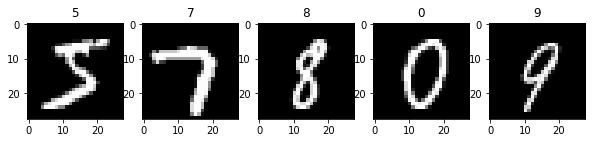

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(10,50))

axs[0].imshow(X_train[0], cmap='gray')
axs[0].set_title(y_train[0])
axs[1].imshow(X_train[214], cmap='gray')
axs[1].set_title(y_train[214])
axs[2].imshow(X_train[300], cmap='gray')
axs[2].set_title(y_train[300])
axs[3].imshow(X_train[1000], cmap='gray')
axs[3].set_title(y_train[1000])
axs[4].imshow(X_train[22], cmap='gray')
axs[4].set_title(y_train[22])
plt.show()

**Preparando os dados**

Como podemos ver, os dados do MNIST são Matrizes, Tensores 2D. Para se tornarem adequados a uma rede Densa, precisamos transforma-los em vetores, com somente uma dimensão. Isso será feito com a camada de *Flatten()*. Ela irá achatar todas as imagens 28x28 em um vetor único de tamanho 784.

Além disso, queremos um modelo que diferencie apenas os 5, e nossos valores Y variam entre 0 e 9. Vamos transformar nossos dados, caso o valor de y seja 5, colocaremos 1, e caso contrário, 0.

In [ ]:
## transformando Y
y_train_5s = y_train==5
y_test_5s = y_test==5

print(y_train[:10])
print(y_train_5s[:10])

[5 0 4 1 9 2 1 3 1 4]
[ True False False False False False False False False False]


Visualizando a alteração.

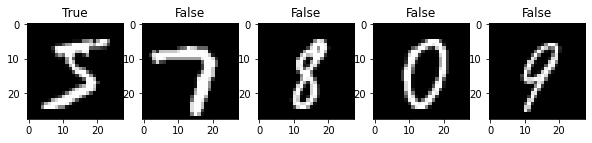

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(10,50))

axs[0].imshow(X_train[0], cmap='gray')
axs[0].set_title(y_train_5s[0])
axs[1].imshow(X_train[214], cmap='gray')
axs[1].set_title(y_train_5s[214])
axs[2].imshow(X_train[300], cmap='gray')
axs[2].set_title(y_train_5s[300])
axs[3].imshow(X_train[1000], cmap='gray')
axs[3].set_title(y_train_5s[1000])
axs[4].imshow(X_train[22], cmap='gray')
axs[4].set_title(y_train_5s[22])
plt.show()

Já sabemos o formato do Input, imagens 28x28 que serão achatadas em vetores 784. Nosso output é um vetor contendo 0s ou 1s, de acordo com a classe da imagem. Agora, basta definir o caminho entre eles.

**Definindo o modelo - Noções probabilísticas na classificação**

Quando trabalhamos com Classificação em Deep Learning, estamos criando, na realidade, um modelo **probabilístico**. O output do modelo deverá ser uma **probabilidade**, no nosso caso, do Input ser o número 5.

Como já sabemos, uma probabilidade tem que seguir algumas restrições.

1. Ela não pode ser menor que 0
2. Ela não pode ser maior que 1

Como fazer com que nosso modelo apresente esse comportamento? Simples, modificando a função de ativação.

![](https://miro.medium.com/max/1452/1*XxxiA0jJvPrHEJHD4z893g.png)

$\overset{w\cdot x+b}{\begin{bmatrix} -120\\
                 55\\
                 0
\end{bmatrix}}
\overset{sigmoid}{\longrightarrow}
\begin{bmatrix} 0.0\\
                0.99\\
                0.5
\end{bmatrix}
$

Relembrando, a função de ativação é a responsável por introduzir não-linearidades nas redes. Após a multiplicação dos pesos, os outputs de uma camada passam por dentro de uma função antes de seguirem no foward propagation. Escolhendo a função adequada, podemos garantir que os valores passados adiante sejam mapeados para um domínio específico.

Para mapear os valores da última camada no intervalo (0,1), utilizaremos a famosa função *Sigmoid*.

Vamos implementar a rede.



In [ ]:
# Importando a camada Flatten

from keras.layers import Flatten

In [ ]:
# Criando o modelo e adicionando a camada Flatten
modelo = Sequential()

modelo.add( Flatten(input_shape=(28,28)) )

In [ ]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


A partir daqui, adicionaremos as camadas intermediárias do modelo, mais uma vez, sinta-se à vontade para testar e modificar o que faremos abaixo.

In [ ]:
modelo.add( Dense(512, activation="relu") )
modelo.add( Dense(216, activation="relu") )
modelo.add( Dense(32, activation="relu") )

# Camada final 
modelo.add( Dense(1, activation="sigmoid") )

In [ ]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                6944      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 519,705
Trainable params: 519,705
Non-trainable params: 0
_________________________________________________________________


**Compilando o modelo**

Aqui, vemos mais algumas particularidades da tarefa de classificação. A função de perda é a *função de entropia cruzada*, no nosso caso, a *função de entropia cruzada binária*, especializada em medir a "distância" entre duas distribuições de probabilidades.

$\overset{\hat y}{\begin{bmatrix} 0.01\\
                 0.50\\
                 0.97
\end{bmatrix}}
\leftrightarrow
\overset{y}{
\begin{bmatrix} 0\\
                0\\
                1
\end{bmatrix}}
$

Além disso, também é comum que adicionemos algumas métricas extras para avaliar o modelo. Elas são calculadas durante cada época e não interferem no fluxo de treino. Adicionamos a métrica de Acurárica.


In [ ]:
modelo.compile(optimizer="adam",
               loss="binary_crossentropy",
               metrics=["accuracy"])

**Treinando o modelo**

Finalmente, podemos treina-lo.

Para adicionar mais uma camada de complexidade, vamos mexer com o parâmetro *validation_split*. Ele vai guardar uma fração dos dados para validação, separando-os do conjunto de treino original.

In [ ]:
modelo.fit(X_train, y_train_5s,
           epochs=15, validation_split=0.10)

Epoch 1/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3934 - accuracy: 0.9778 - val_loss: 0.0786 - val_accuracy: 0.9897
Epoch 2/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0464 - accuracy: 0.9894 - val_loss: 0.0522 - val_accuracy: 0.9893
Epoch 3/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9921 - val_loss: 0.0324 - val_accuracy: 0.9928
Epoch 4/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9927 - val_loss: 0.0295 - val_accuracy: 0.9935
Epoch 5/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0311 - val_accuracy: 0.9940
Epoch 6/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0422 - val_accuracy: 0.9923
Epoch 7/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0365 - val_accuracy:

A acurácia do nosso modelo chegou a 99% tanto nos dados de treino como de validação.

Antes da conclusão final, precisamos lembrar que o número 5 ocupa apenas 10% de todo o dataset, ou seja, um classificador "burro" que chute somente que um número não é 5 é capaz de ter uma acurácia de 90%. 

Mesmo dessa forma, nosso modelo chegou a 99% de acurácia, ou seja, ele é realmente capaz de distinguir o dígito 5 dos outros dígitos.

### Detector de Dígito - Multiclassificação com MNIST

Agora que já sabemos como criar o clássificador mais simples, o binário, e somos capazes de entender a natureza probabilística das Redes Neurais, basta estendermos alguns desses conceitos para a tarefa de multiclassificação. 

**Entendendo Multiclass e Multilabel**

Quando uma instância do dataset tem a possibilidade de pertencer a mais de duas classes, estamos trabalhando com um problema de multiclass. Caso ela possa pertencer simultâneamente a mais de uma das classes, estamos trabalhando com um problema de multilabel.

Esses conceitos são importantes, pois alteram a função de ativação que iremos utilizar ao final da rede e sua função de ativação. 

Caso nossos dados pertençam a múltiplas classes simultaneamente, os dados finais podem ser simplesmente transformados pela função sigmoid.

$W\cdot X + b
\overset{sigmoid}{\longrightarrow}
\begin{bmatrix} 0.0 & 0.99 & 0.5\\
                0.0 & 0.5 & 0.56\\
\end{bmatrix}
$

Caso eles pertençam a somente uma classe por vês, as probabilidades previstas precisam somar 1. A função de ativação responsável por essa transformação é a softmax.

$W\cdot X + b
\overset{softmax}{\longrightarrow}
\begin{bmatrix} 0.0 & 0.99 & 0.0\\
                0.90 & 0.05 & 0.05\\
\end{bmatrix}
$

Nesse ultimo caso, somente uma classe é predita, a de maior probabilidade.


**Dados utilizados**

Os dados utilizados serão os mesmos da tarefa anterior, sendo que usaremos o y original, com o valor das classes.

**Preparando os dados**

Uma transformação válidade ser fazer nos dados y é transforma-los em distribuições de probabilidades. Isto é, se um número é $y=5$, ele será mapeado para a seguinte distribuição probabilística:

$ \begin{bmatrix} 0 &0 &0 &0 &0 &1 &0 &0 &0 &0 &0\\
\end{bmatrix}$

Dessa forma, podemos calcular a entropia cruzada entre a previsão do modelo e a distribuição original. Entretanto, o Keras felizmente faz isso automaticamente para nós em problemas de multiclass não-multilabel, basta setar o a função de custo para *sparse_categorical_crossentropy*.

**Definindo o modelo**

Com essas informações adicionais e a experiência da seção anterior, já somos capazes de criar um modelo que preveja qual o dígito escrito.

In [ ]:
modelo_mnist = Sequential()

modelo_mnist.add( Flatten(input_shape=(28,28)) )
modelo_mnist.add( Dense(1024, activation="relu") ) 
modelo_mnist.add( Dense(512, activation="relu") )
modelo_mnist.add( Dense(256, activation="relu") )
modelo_mnist.add( Dense(128, activation="relu") )
modelo_mnist.add( Dense(64, activation="relu") )

# camada final, 10 classes não-multilabel
modelo_mnist.add( Dense(10, activation="softmax") )

In [ ]:
modelo_mnist.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [ ]:
modelo_mnist.compile(optimizer="adam",
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

**Treinando o modelo**

Para adicionar mais uma informação, vamos mencionar um detalhe importante do método *.fit()* não mencionado até aqui. Quando chamado, ele retorna um histórico, que contém os dados da função de custo e das métricas ao longo das épocas.

In [ ]:
historico = modelo_mnist.fit(X_train, y_train, 
                             epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.6464 - accuracy: 0.9029 - val_loss: 0.1424 - val_accuracy: 0.9590
Epoch 2/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.1657 - accuracy: 0.9535 - val_loss: 0.1478 - val_accuracy: 0.9596
Epoch 3/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.1505 - accuracy: 0.9597 - val_loss: 0.1568 - val_accuracy: 0.9584
Epoch 4/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.1251 - accuracy: 0.9650 - val_loss: 0.1668 - val_accuracy: 0.9613
Epoch 5/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.1106 - accuracy: 0.9713 - val_loss: 0.1250 - val_accuracy: 0.9707
Epoch 6/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.0992 - accuracy: 0.9750 - val_loss: 0.1368 - val_accuracy: 0.9670
Epoch 7/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.0828 - accuracy: 0.9782 - val_loss: 0.1174 - val_accuracy:

Vamos visualizar o histórico.

In [ ]:
historico.history

{'accuracy': [0.9028627276420593,
  0.9534509778022766,
  0.959686279296875,
  0.9649608135223389,
  0.9713137149810791,
  0.9749608039855957,
  0.9782156944274902,
  0.982039213180542,
  0.983274519443512,
  0.9836470484733582],
 'loss': [0.646422803401947,
  0.1656540036201477,
  0.15048696100711823,
  0.12510855495929718,
  0.11062309145927429,
  0.09920234233140945,
  0.08282773941755295,
  0.07126730680465698,
  0.06636375188827515,
  0.06730475276708603],
 'val_accuracy': [0.9589999914169312,
  0.9595555663108826,
  0.9584444165229797,
  0.9613333344459534,
  0.9706666469573975,
  0.9670000076293945,
  0.9744444489479065,
  0.9789999723434448,
  0.9748888611793518,
  0.9718888998031616],
 'val_loss': [0.14243783056735992,
  0.14781174063682556,
  0.15682220458984375,
  0.16683484613895416,
  0.12495334446430206,
  0.1368046998977661,
  0.11743403971195221,
  0.10664422065019608,
  0.10979848355054855,
  0.14740461111068726]}

E plotar alguns gráficos

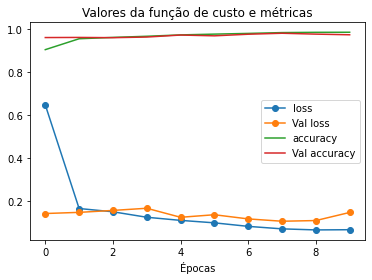

In [ ]:

plt.plot( historico.history["loss"], '-o', label = "loss" )
plt.plot( historico.history["val_loss"], '-o', label = "Val loss" )

plt.plot( historico.history["accuracy"], label = "accuracy" )
plt.plot( historico.history["val_accuracy"], label = "Val accuracy" )

plt.xlabel("Épocas")

plt.title("Valores da função de custo e métricas")

plt.legend()
plt.show()

A rede realmente foi capaz de cumprir sua tarefa, com aproximadamente 98% de acurácia nos dados de treino e teste.

## Conclusão

Neste noteboook demos uma leve introdução à área de de Deep Learning usando o Keras, falando de forma breve e rápida sobre os principais tópicos que a rodeam. Entretanto, ainda há muito a se descobrir.
Além de aprofundar temas tratados de forma breve, como otimizadores e regularizadores, ainda existem milhares de outras arquiteturas e camadas a se explorar. Este notebook é somente um aranhão na superfície da grande área de Deep Learning, mas espero que ele tenha sido capaz de lhe introduzir ao tema.